### Analyses of wheel movements at profficiency
Jun2023 \
author: Inês Laranjeira

In [1]:
"""
IMPORTS
"""
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import os
from mpl_toolkits.mplot3d import Axes3D

from brainbox.task.trials import find_trial_ids
from brainbox.behavior.training import get_sessions, get_training_status
from brainbox.io.one import load_wheel_reaction_times
import brainbox.behavior.wheel as wh
from ibllib.io.extractors.ephys_fpga import extract_wheel_moves
from ibllib.io.extractors.training_wheel import extract_first_movement_times
from one.api import ONE

one = ONE()

# Get my functions
functions_path =  '/home/ines/repositories/representation_learning_variability/Functions/'
# functions_path = '/Users/ineslaranjeira/Documents/Repositories/representation_learning_variability//Models/Sub-trial//2_fit_models/'
os.chdir(functions_path)
from one_functions_generic import query_subjects_interest, subjects_interest_data, prepro, timeseries_PSTH

## Get training data

In [2]:
# Get subjects of interest
subjects_of_interest = query_subjects_interest(protocol='ephys', ibl_project='ibl_neuropixel_brainwide_01')
#data = subjects_interest_data(subjects_of_interest)
data = subjects_interest_data(['ibl_witten_32'], phase='proficient', protocol='ephys')

TypeError: query_subjects_interest() missing 1 required positional argument: 'one'

In [3]:
subjects_interest = query_subjects_interest(protocol='training', ibl_project='ibl_neuropixel_brainwide_01')
subjects_interest

TypeError: query_subjects_interest() missing 1 required positional argument: 'one'

In [60]:
data = subjects_interest_data(['KS046'], phase='learning', protocol='training')
new_data = prepro(data)

In [61]:
perf = pd.DataFrame(new_data.groupby(['subject_nickname', 'session_start_time', 'session'])['correct_easy'].mean())
perf = perf.reset_index(level=[0, 1, 2])

<AxesSubplot: xlabel='session_start_time', ylabel='correct_easy'>

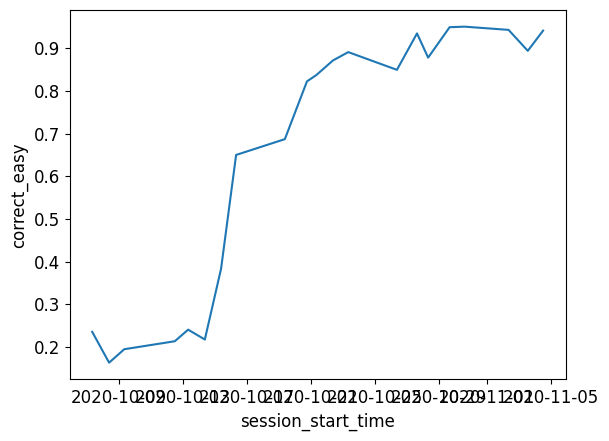

In [63]:
sns.lineplot(x='session_start_time', y='correct_easy', data=perf)

## Get proficient data

In [9]:
# Choose a session with good QC
data_path = '/home/ines/repositories/representation_learning_variability/Video and wheel/'
# data_path = '/Users/ineslaranjeira/Documents/Repositories/representation_learning_variability/Video and wheel/'

os.chdir(data_path)
pass_qc = pickle.load(open(data_path + "good_brainwide_sessions_metadata", "rb"))
pass_qc = pickle.load(open(data_path + "good_dlc_bwm_sessions_metadata", "rb"))


## Plot wheel movements

In [4]:
t_init = 1  # time to plot before stimulus onset
t_end = 1.5 # time to plot after stimulus onset
interval_length = int((t_end + t_init) * 1000)

### Plot per stimulus side 

In [5]:
threshold_deg = 35
gain = 4
threshold_rad = wh.cm_to_rad(1e-1) * (threshold_deg / gain)

In [13]:
plot_data

,feedback,choice,contrast,response_time,feedback_time,variable,value,side
0,1.0,1.0,1.0000,0.701216,0.701330,-1.000,0.000005,1.0
1,1.0,1.0,0.1250,0.723896,0.723994,-1.000,0.000000,1.0
2,1.0,1.0,1.0000,0.185609,0.185715,-1.000,-0.000010,1.0
3,-1.0,1.0,0.0625,0.330993,0.332033,-1.000,0.000055,-1.0
4,1.0,1.0,0.2500,0.218195,0.218278,-1.000,-0.000007,1.0
...,...,...,...,...,...,...,...,...
827581,1.0,-1.0,0.2500,0.692143,0.692264,0.998,0.000123,-1.0
827582,1.0,-1.0,0.0625,0.602946,0.603040,0.998,0.000554,-1.0
827583,1.0,-1.0,1.0000,0.288294,0.288404,0.998,0.000975,-1.0
827584,1.0,-1.0,1.0000,0.663584,0.663700,0.998,0.000437,-1.0


### Proficient session

/home/ines/repositories/representation_learning_variability/Functions/one_functions_generic.py:496: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trials['contrastLeft'] = trials['contrastLeft'].fillna(0)
/home/ines/repositories/representation_learning_variability/Functions/one_functions_generic.py:497: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trials['contrastRight'] = trials['contrastRight'].fillna(0)
/home/ines/repositories/representation_learning_variability/Functions/one_functions_generic.py:498: Se

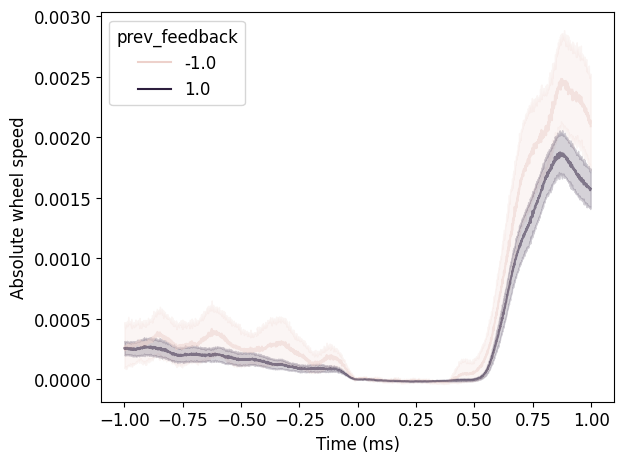

/home/ines/repositories/representation_learning_variability/Functions/one_functions_generic.py:496: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trials['contrastLeft'] = trials['contrastLeft'].fillna(0)
/home/ines/repositories/representation_learning_variability/Functions/one_functions_generic.py:497: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trials['contrastRight'] = trials['contrastRight'].fillna(0)
/home/ines/repositories/representation_learning_variability/Functions/one_functions_generic.py:498: Se

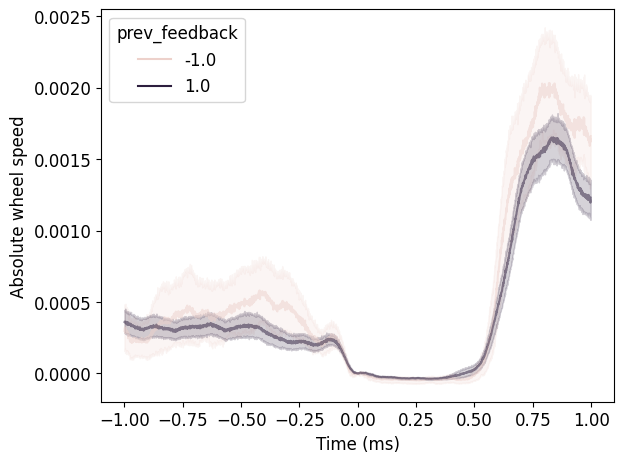

/home/ines/repositories/representation_learning_variability/Functions/one_functions_generic.py:496: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trials['contrastLeft'] = trials['contrastLeft'].fillna(0)
/home/ines/repositories/representation_learning_variability/Functions/one_functions_generic.py:497: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trials['contrastRight'] = trials['contrastRight'].fillna(0)
/home/ines/repositories/representation_learning_variability/Functions/one_functions_generic.py:498: Se

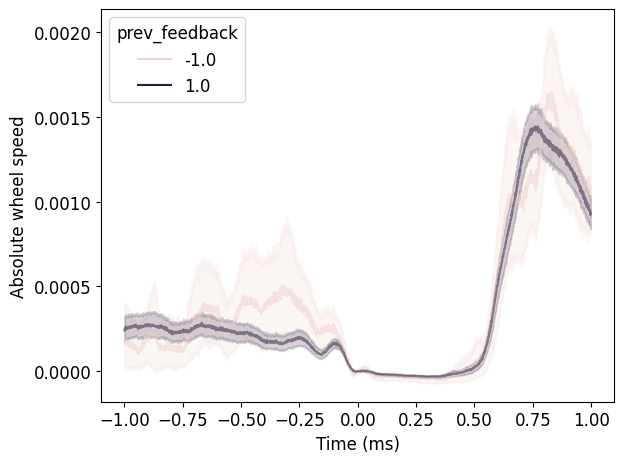

/home/ines/repositories/representation_learning_variability/Functions/one_functions_generic.py:496: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trials['contrastLeft'] = trials['contrastLeft'].fillna(0)
/home/ines/repositories/representation_learning_variability/Functions/one_functions_generic.py:497: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trials['contrastRight'] = trials['contrastRight'].fillna(0)
/home/ines/repositories/representation_learning_variability/Functions/one_functions_generic.py:498: Se

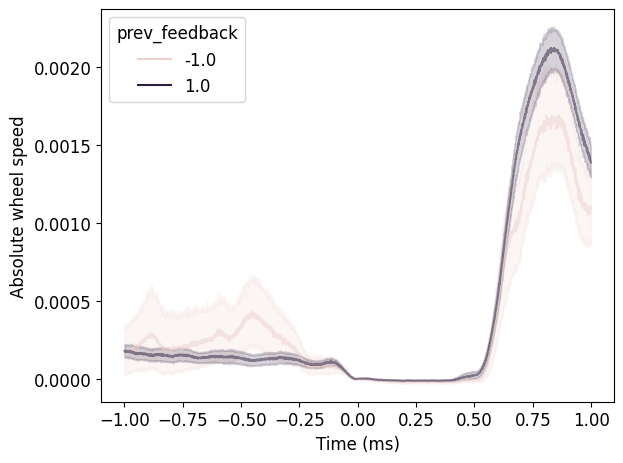

/home/ines/repositories/representation_learning_variability/Functions/one_functions_generic.py:496: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trials['contrastLeft'] = trials['contrastLeft'].fillna(0)
/home/ines/repositories/representation_learning_variability/Functions/one_functions_generic.py:497: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trials['contrastRight'] = trials['contrastRight'].fillna(0)
/home/ines/repositories/representation_learning_variability/Functions/one_functions_generic.py:498: Se

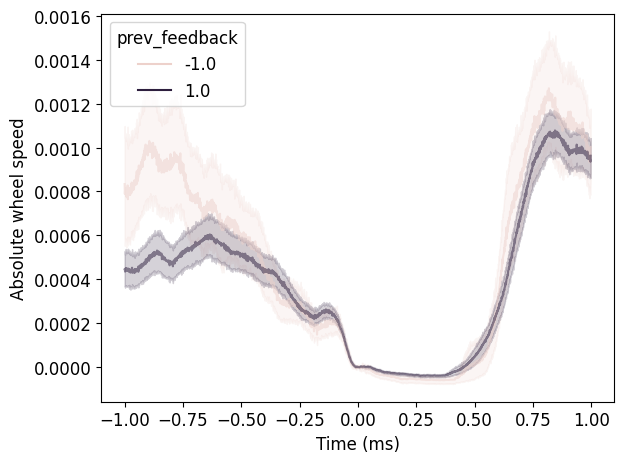

/home/ines/repositories/representation_learning_variability/Functions/one_functions_generic.py:496: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trials['contrastLeft'] = trials['contrastLeft'].fillna(0)
/home/ines/repositories/representation_learning_variability/Functions/one_functions_generic.py:497: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trials['contrastRight'] = trials['contrastRight'].fillna(0)
/home/ines/repositories/representation_learning_variability/Functions/one_functions_generic.py:498: Se

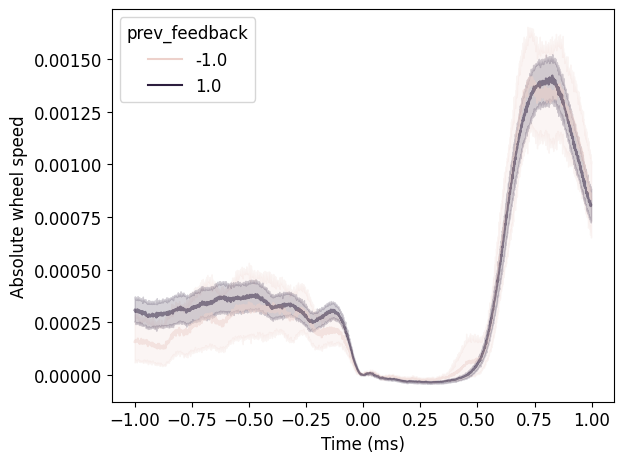

/home/ines/repositories/representation_learning_variability/Functions/one_functions_generic.py:496: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trials['contrastLeft'] = trials['contrastLeft'].fillna(0)
/home/ines/repositories/representation_learning_variability/Functions/one_functions_generic.py:497: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trials['contrastRight'] = trials['contrastRight'].fillna(0)
/home/ines/repositories/representation_learning_variability/Functions/one_functions_generic.py:498: Se

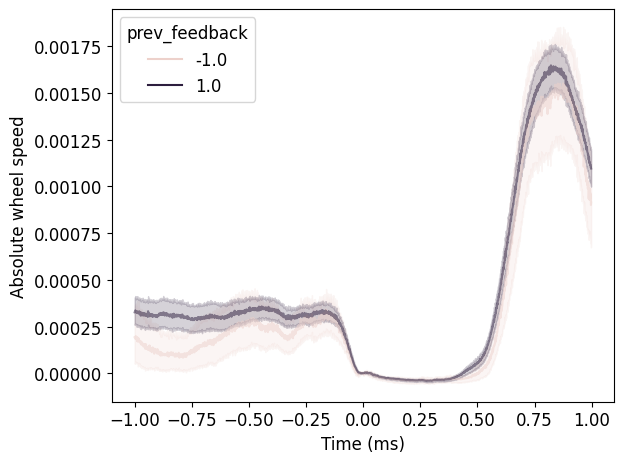

/home/ines/repositories/representation_learning_variability/Functions/one_functions_generic.py:496: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trials['contrastLeft'] = trials['contrastLeft'].fillna(0)
/home/ines/repositories/representation_learning_variability/Functions/one_functions_generic.py:497: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trials['contrastRight'] = trials['contrastRight'].fillna(0)
/home/ines/repositories/representation_learning_variability/Functions/one_functions_generic.py:498: Se

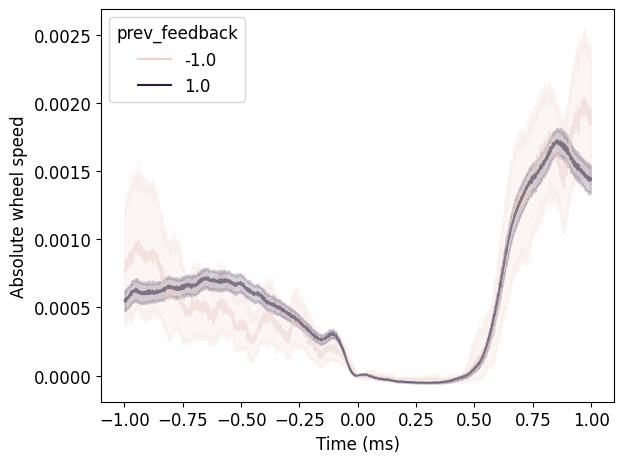

/home/ines/repositories/representation_learning_variability/Functions/one_functions_generic.py:496: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trials['contrastLeft'] = trials['contrastLeft'].fillna(0)
/home/ines/repositories/representation_learning_variability/Functions/one_functions_generic.py:497: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trials['contrastRight'] = trials['contrastRight'].fillna(0)
/home/ines/repositories/representation_learning_variability/Functions/one_functions_generic.py:498: Se

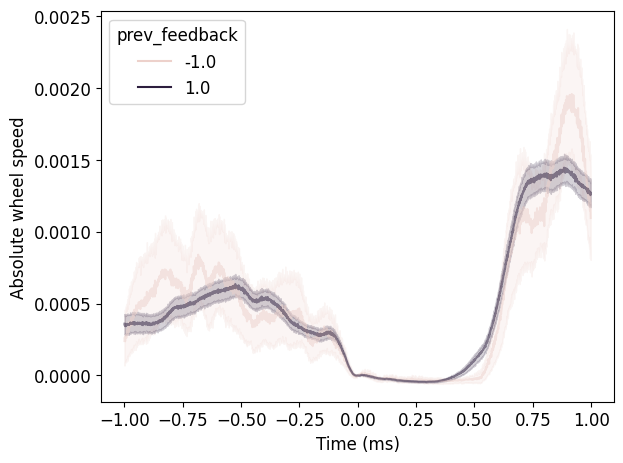

/home/ines/repositories/representation_learning_variability/Functions/one_functions_generic.py:496: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trials['contrastLeft'] = trials['contrastLeft'].fillna(0)
/home/ines/repositories/representation_learning_variability/Functions/one_functions_generic.py:497: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trials['contrastRight'] = trials['contrastRight'].fillna(0)
/home/ines/repositories/representation_learning_variability/Functions/one_functions_generic.py:498: Se

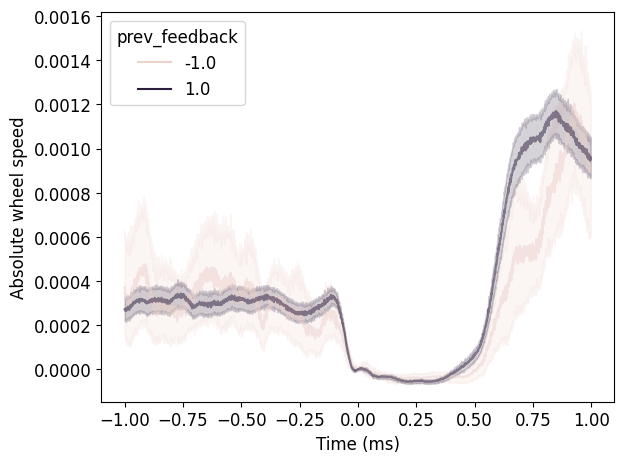

/home/ines/repositories/representation_learning_variability/Functions/one_functions_generic.py:496: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trials['contrastLeft'] = trials['contrastLeft'].fillna(0)
/home/ines/repositories/representation_learning_variability/Functions/one_functions_generic.py:497: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trials['contrastRight'] = trials['contrastRight'].fillna(0)
/home/ines/repositories/representation_learning_variability/Functions/one_functions_generic.py:498: Se

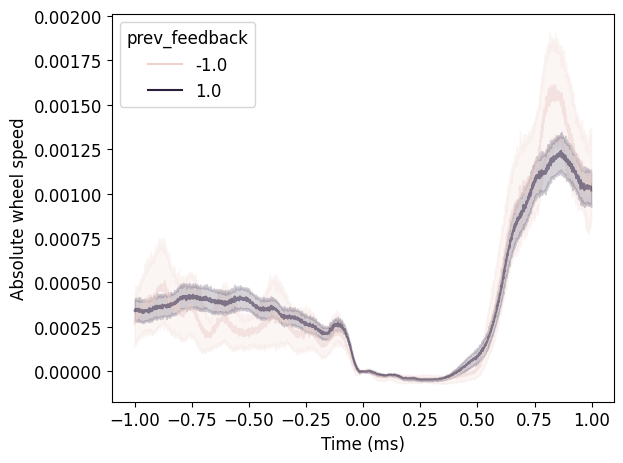

/home/ines/repositories/representation_learning_variability/Functions/one_functions_generic.py:496: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trials['contrastLeft'] = trials['contrastLeft'].fillna(0)
/home/ines/repositories/representation_learning_variability/Functions/one_functions_generic.py:497: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trials['contrastRight'] = trials['contrastRight'].fillna(0)
/home/ines/repositories/representation_learning_variability/Functions/one_functions_generic.py:498: Se

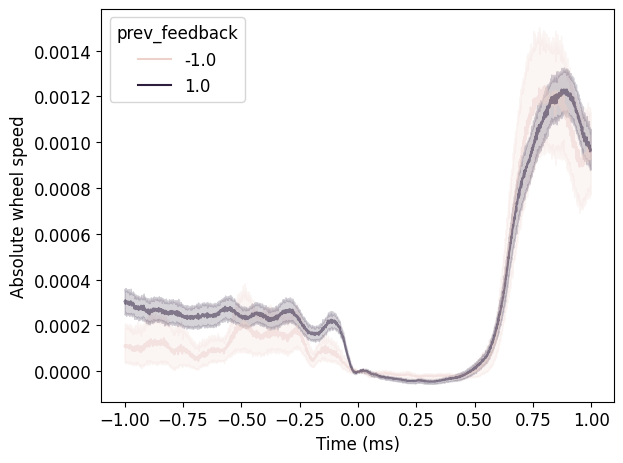

/home/ines/repositories/representation_learning_variability/Functions/one_functions_generic.py:496: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trials['contrastLeft'] = trials['contrastLeft'].fillna(0)
/home/ines/repositories/representation_learning_variability/Functions/one_functions_generic.py:497: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trials['contrastRight'] = trials['contrastRight'].fillna(0)
/home/ines/repositories/representation_learning_variability/Functions/one_functions_generic.py:498: Se

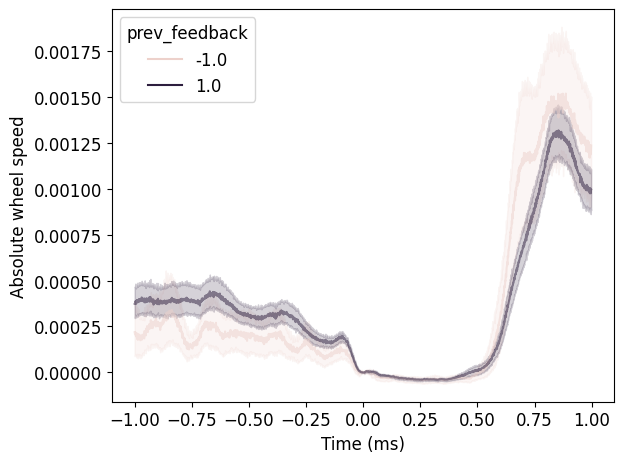

/home/ines/repositories/representation_learning_variability/Functions/one_functions_generic.py:496: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trials['contrastLeft'] = trials['contrastLeft'].fillna(0)
/home/ines/repositories/representation_learning_variability/Functions/one_functions_generic.py:497: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trials['contrastRight'] = trials['contrastRight'].fillna(0)
/home/ines/repositories/representation_learning_variability/Functions/one_functions_generic.py:498: Se

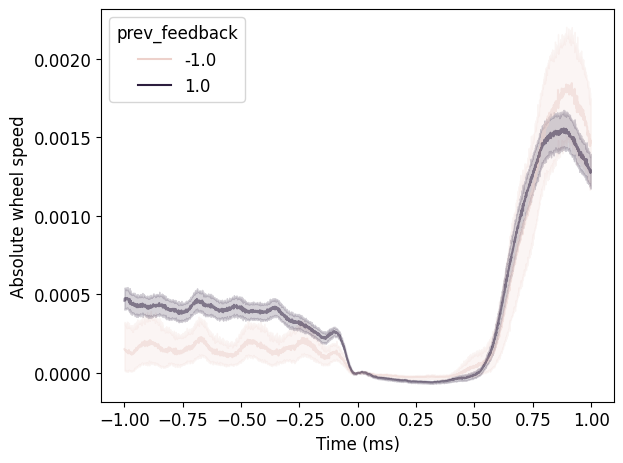

/home/ines/repositories/representation_learning_variability/Functions/one_functions_generic.py:496: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trials['contrastLeft'] = trials['contrastLeft'].fillna(0)
/home/ines/repositories/representation_learning_variability/Functions/one_functions_generic.py:497: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trials['contrastRight'] = trials['contrastRight'].fillna(0)
/home/ines/repositories/representation_learning_variability/Functions/one_functions_generic.py:498: Se

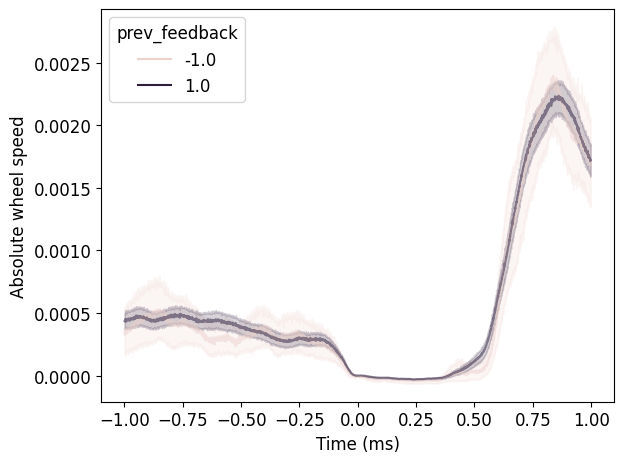

/home/ines/repositories/representation_learning_variability/Functions/one_functions_generic.py:496: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trials['contrastLeft'] = trials['contrastLeft'].fillna(0)
/home/ines/repositories/representation_learning_variability/Functions/one_functions_generic.py:497: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trials['contrastRight'] = trials['contrastRight'].fillna(0)
/home/ines/repositories/representation_learning_variability/Functions/one_functions_generic.py:498: Se

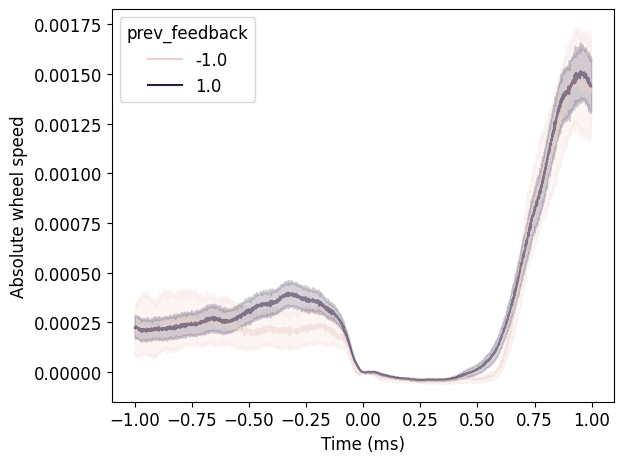

/home/ines/repositories/representation_learning_variability/Functions/one_functions_generic.py:496: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trials['contrastLeft'] = trials['contrastLeft'].fillna(0)
/home/ines/repositories/representation_learning_variability/Functions/one_functions_generic.py:497: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trials['contrastRight'] = trials['contrastRight'].fillna(0)
/home/ines/repositories/representation_learning_variability/Functions/one_functions_generic.py:498: Se

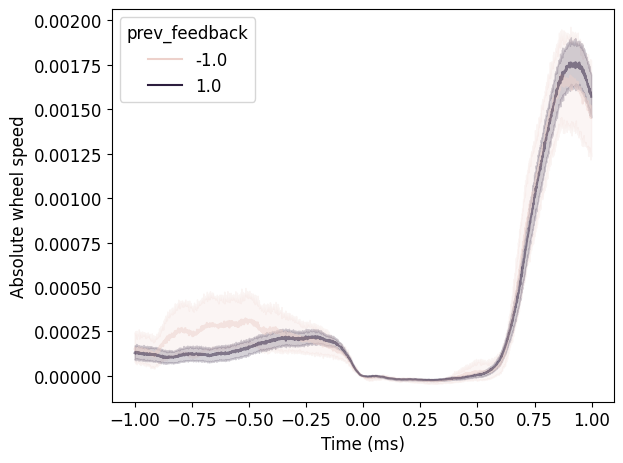

/home/ines/repositories/representation_learning_variability/Functions/one_functions_generic.py:496: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trials['contrastLeft'] = trials['contrastLeft'].fillna(0)
/home/ines/repositories/representation_learning_variability/Functions/one_functions_generic.py:497: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trials['contrastRight'] = trials['contrastRight'].fillna(0)
/home/ines/repositories/representation_learning_variability/Functions/one_functions_generic.py:498: Se

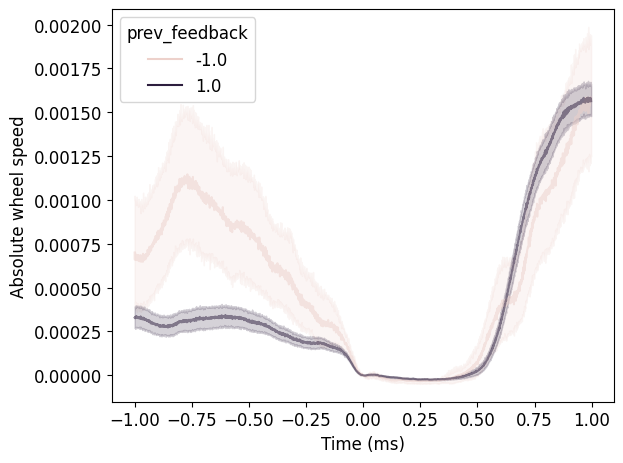

/home/ines/repositories/representation_learning_variability/Functions/one_functions_generic.py:496: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trials['contrastLeft'] = trials['contrastLeft'].fillna(0)
/home/ines/repositories/representation_learning_variability/Functions/one_functions_generic.py:497: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trials['contrastRight'] = trials['contrastRight'].fillna(0)
/home/ines/repositories/representation_learning_variability/Functions/one_functions_generic.py:498: Se

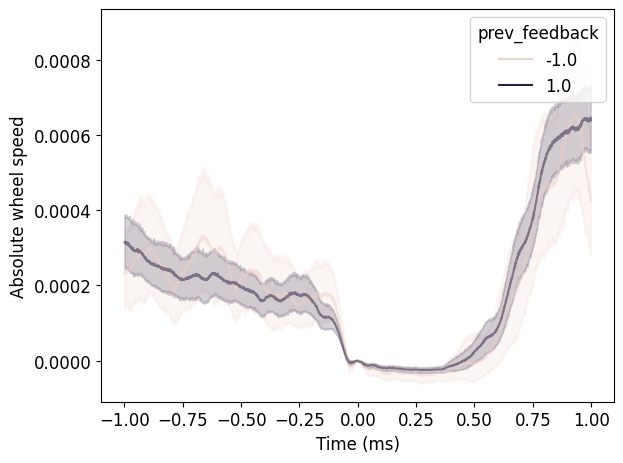

/home/ines/repositories/representation_learning_variability/Functions/one_functions_generic.py:496: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trials['contrastLeft'] = trials['contrastLeft'].fillna(0)
/home/ines/repositories/representation_learning_variability/Functions/one_functions_generic.py:497: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trials['contrastRight'] = trials['contrastRight'].fillna(0)
/home/ines/repositories/representation_learning_variability/Functions/one_functions_generic.py:498: Se

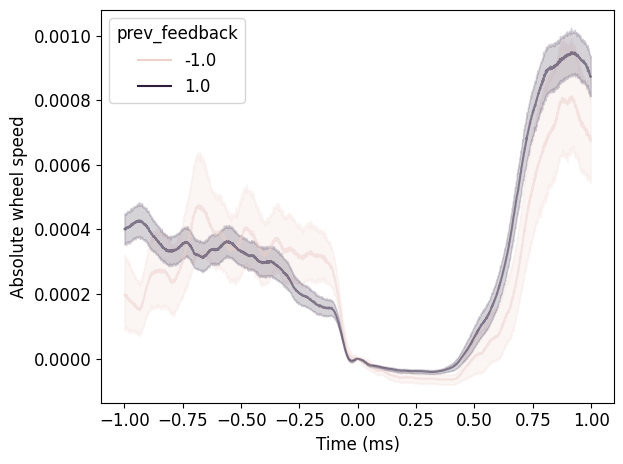

/home/ines/repositories/representation_learning_variability/Functions/one_functions_generic.py:496: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trials['contrastLeft'] = trials['contrastLeft'].fillna(0)
/home/ines/repositories/representation_learning_variability/Functions/one_functions_generic.py:497: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trials['contrastRight'] = trials['contrastRight'].fillna(0)
/home/ines/repositories/representation_learning_variability/Functions/one_functions_generic.py:498: Se

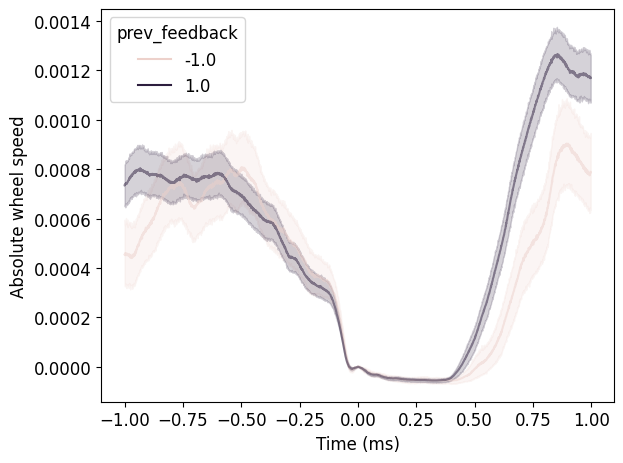

/home/ines/repositories/representation_learning_variability/Functions/one_functions_generic.py:496: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trials['contrastLeft'] = trials['contrastLeft'].fillna(0)
/home/ines/repositories/representation_learning_variability/Functions/one_functions_generic.py:497: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trials['contrastRight'] = trials['contrastRight'].fillna(0)
/home/ines/repositories/representation_learning_variability/Functions/one_functions_generic.py:498: Se

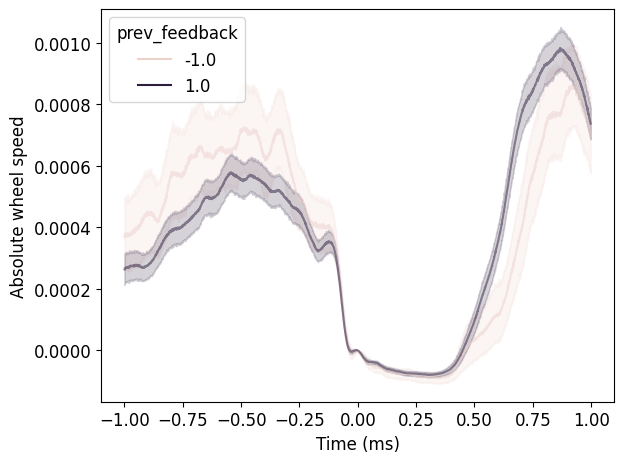

/home/ines/repositories/representation_learning_variability/Functions/one_functions_generic.py:496: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trials['contrastLeft'] = trials['contrastLeft'].fillna(0)
/home/ines/repositories/representation_learning_variability/Functions/one_functions_generic.py:497: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trials['contrastRight'] = trials['contrastRight'].fillna(0)
/home/ines/repositories/representation_learning_variability/Functions/one_functions_generic.py:498: Se

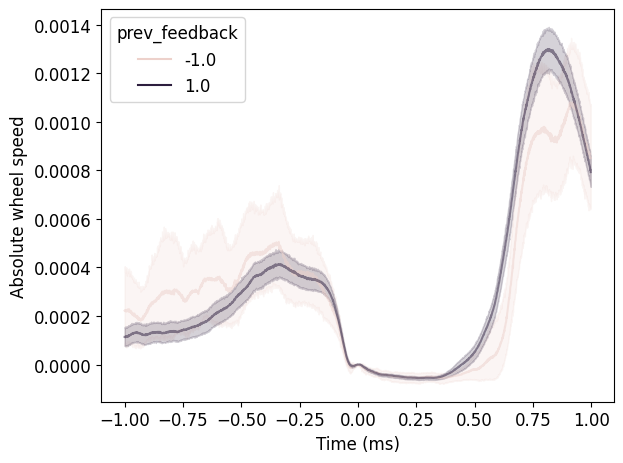

/home/ines/repositories/representation_learning_variability/Functions/one_functions_generic.py:496: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trials['contrastLeft'] = trials['contrastLeft'].fillna(0)
/home/ines/repositories/representation_learning_variability/Functions/one_functions_generic.py:497: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trials['contrastRight'] = trials['contrastRight'].fillna(0)
/home/ines/repositories/representation_learning_variability/Functions/one_functions_generic.py:498: Se

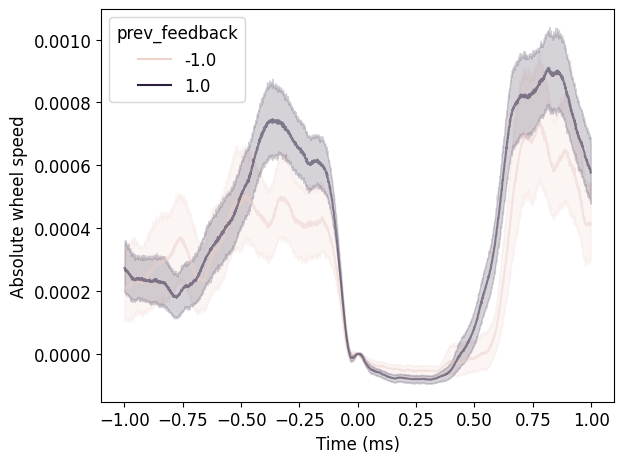

/home/ines/repositories/representation_learning_variability/Functions/one_functions_generic.py:496: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trials['contrastLeft'] = trials['contrastLeft'].fillna(0)
/home/ines/repositories/representation_learning_variability/Functions/one_functions_generic.py:497: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trials['contrastRight'] = trials['contrastRight'].fillna(0)
/home/ines/repositories/representation_learning_variability/Functions/one_functions_generic.py:498: Se

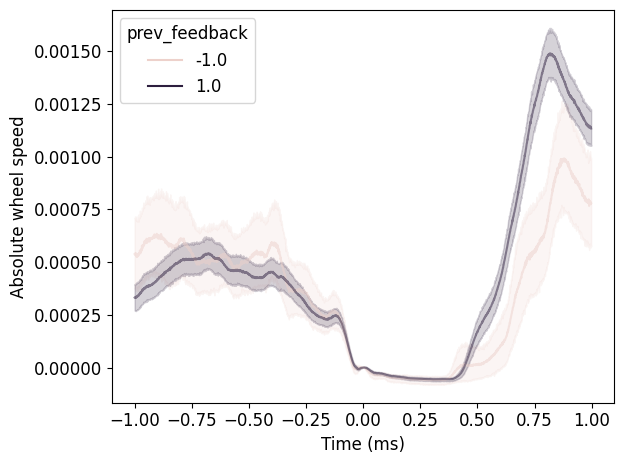

local md5 mismatch on dataset: churchlandlab/Subjects/CSHL049/2020-01-11/001/alf/_ibl_trials.stimOff_times.npy
/home/ines/Downloads/ONE/alyx.internationalbrainlab.org/churchlandlab/Subjects/CSHL049/2020-01-11/001/alf/_ibl_trials.stimOff_times.npy: 100%|██████████| 4.60k/4.60k [00:00<00:00, 14.0kB/s]
/home/ines/repositories/representation_learning_variability/Functions/one_functions_generic.py:496: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trials['contrastLeft'] = trials['contrastLeft'].fillna(0)
/home/ines/repositories/representation_learning_variability/Functions/one_functions_generic.py:497: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

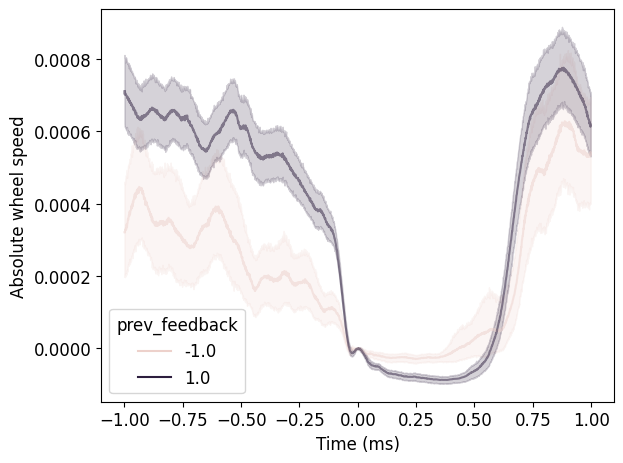

/home/ines/repositories/representation_learning_variability/Functions/one_functions_generic.py:496: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trials['contrastLeft'] = trials['contrastLeft'].fillna(0)
/home/ines/repositories/representation_learning_variability/Functions/one_functions_generic.py:497: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trials['contrastRight'] = trials['contrastRight'].fillna(0)
/home/ines/repositories/representation_learning_variability/Functions/one_functions_generic.py:498: Se

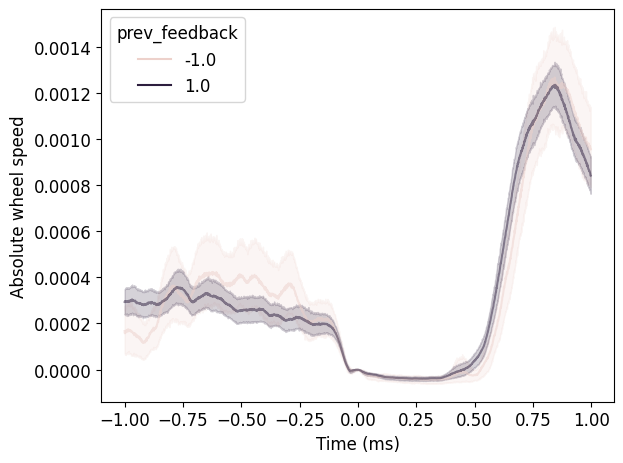

/home/ines/repositories/representation_learning_variability/Functions/one_functions_generic.py:496: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trials['contrastLeft'] = trials['contrastLeft'].fillna(0)
/home/ines/repositories/representation_learning_variability/Functions/one_functions_generic.py:497: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trials['contrastRight'] = trials['contrastRight'].fillna(0)
/home/ines/repositories/representation_learning_variability/Functions/one_functions_generic.py:498: Se

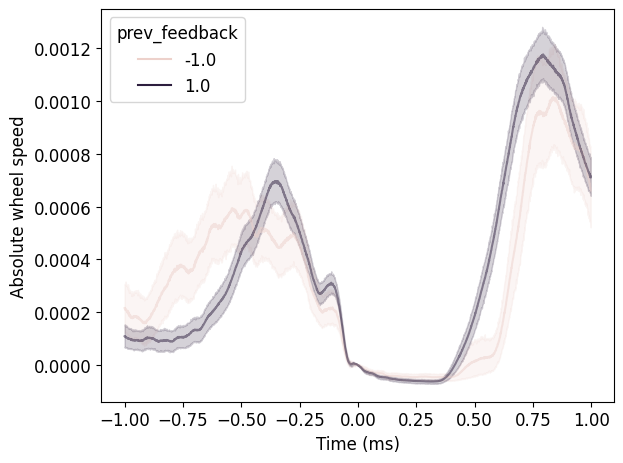

/home/ines/repositories/representation_learning_variability/Functions/one_functions_generic.py:496: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trials['contrastLeft'] = trials['contrastLeft'].fillna(0)
/home/ines/repositories/representation_learning_variability/Functions/one_functions_generic.py:497: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trials['contrastRight'] = trials['contrastRight'].fillna(0)
/home/ines/repositories/representation_learning_variability/Functions/one_functions_generic.py:498: Se

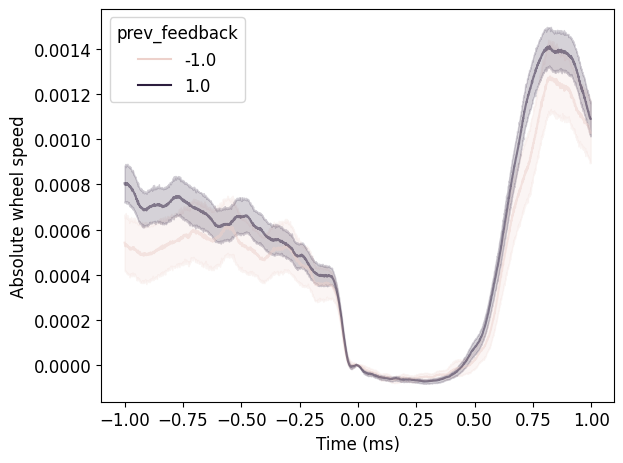

/home/ines/repositories/representation_learning_variability/Functions/one_functions_generic.py:496: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trials['contrastLeft'] = trials['contrastLeft'].fillna(0)
/home/ines/repositories/representation_learning_variability/Functions/one_functions_generic.py:497: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trials['contrastRight'] = trials['contrastRight'].fillna(0)
/home/ines/repositories/representation_learning_variability/Functions/one_functions_generic.py:498: Se

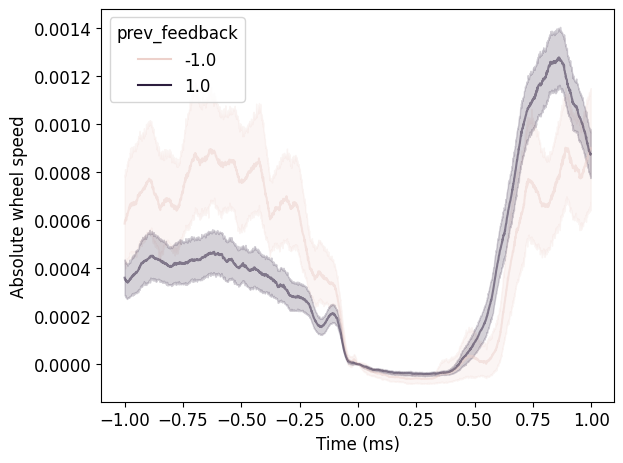

/home/ines/repositories/representation_learning_variability/Functions/one_functions_generic.py:496: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trials['contrastLeft'] = trials['contrastLeft'].fillna(0)
/home/ines/repositories/representation_learning_variability/Functions/one_functions_generic.py:497: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trials['contrastRight'] = trials['contrastRight'].fillna(0)
/home/ines/repositories/representation_learning_variability/Functions/one_functions_generic.py:498: Se

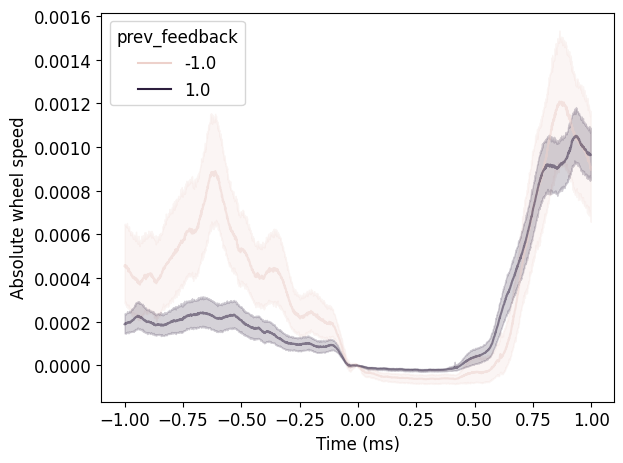

/home/ines/repositories/representation_learning_variability/Functions/one_functions_generic.py:496: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trials['contrastLeft'] = trials['contrastLeft'].fillna(0)
/home/ines/repositories/representation_learning_variability/Functions/one_functions_generic.py:497: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trials['contrastRight'] = trials['contrastRight'].fillna(0)
/home/ines/repositories/representation_learning_variability/Functions/one_functions_generic.py:498: Se

KeyboardInterrupt: 

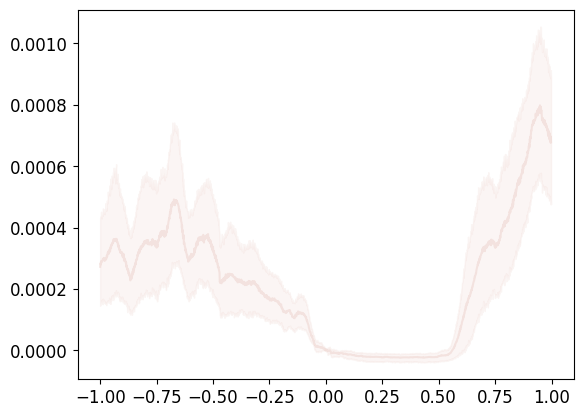

In [14]:
one = ONE()

sessions = ['d23a44ef-1402-4ed7-97f5-47e9a7a504d9']
#sessions = ['cb2ad999-a6cb-42ff-bf71-1774c57e5308']
#sessions = ['288bfbf3-3700-4abe-b6e4-130b5c541e61']
sessions = ['2e6e179c-fccc-4e8f-9448-ce5b6858a183']

t_init = 1
t_end = 1
event = 'stimOn_times'
event = 'quiescence_start'

for s, session in enumerate(pass_qc['session_uuid']):
    
    # Trials data
    data = one.load_object(session, obj='trials', namespace='ibl')
    data = data.to_df()
    data['quiescence_start'] = data['goCueTrigger_times'] - data['quiescencePeriod']

    wheel = one.load_object(session, 'wheel', collection='alf')
    #trials_data = data.loc[data['session']==session][0:50]
    processed_data = prepro(data[0:50])
    processed_data = prepro(data)

    # Get wheel data for that session
    pos, time = wh.interpolate_position(wheel.timestamps, wheel.position)
    pos = np.abs(np.diff(pos))
    

    wheel_df = timeseries_PSTH(time[1:], pos, data, event, t_init, t_end, subtract_baseline=True)
    wheel_df['side'] = wheel_df['choice'] * wheel_df['feedback']
    wheel_df['prev_feedback'] = wheel_df['feedback'].copy()
    wheel_df['prev_feedback'][1:] = wheel_df['feedback'][:-1] 
    
    plt.rc('font', size=12)

    plot_data = wheel_df.loc[wheel_df['choice'].isin([-1, 1])]
    # plot_data.loc[plot_data['choice']==-1, 'choice'] = 'Left'
    # plot_data.loc[plot_data['choice']==1, 'choice'] = 'Right'

    sns.lineplot(x='variable', y='value', hue='prev_feedback', data=plot_data, alpha=.5)
    plt.xlabel('Time (ms)')
    plt.ylabel('Absolute wheel speed')
    # plt.hlines(0.28, -t_init, t_end, color='grey', linestyles='dashed')
    # plt.hlines(-0.28, -t_init, t_end, color='grey', linestyles='dashed')

    #plt.ylim([-.4, .4])
    # plt.title('Proficient session')
    #plt.hlines(0.28, 9, 2500, color='grey', linestyles='dashed')
    #plt.hlines(-0.28, 9, 2500, color='grey', linestyles='dashed')
    plt.tight_layout()
    plt.show()

### Naif session

/home/ines/Downloads/ONE/alyx.internationalbrainlab.org/churchlandlab/Subjects/CSHL049/2019-11-04/001/alf/_ibl_wheel.timestamps.npy: 100%|██████████| 1.64M/1.64M [00:01<00:00, 1.21MB/s]
/home/ines/Downloads/ONE/alyx.internationalbrainlab.org/churchlandlab/Subjects/CSHL049/2019-11-04/001/alf/_ibl_wheel.position.npy: 100%|██████████| 1.64M/1.64M [00:00<00:00, 1.99MB/s]
/home/ines/Downloads/ONE/alyx.internationalbrainlab.org/churchlandlab/Subjects/CSHL049/2019-11-04/001/alf/_ibl_wheelMoves.peakAmplitude.npy: 100%|██████████| 5.22k/5.22k [00:00<00:00, 15.7kB/s]
/home/ines/Downloads/ONE/alyx.internationalbrainlab.org/churchlandlab/Subjects/CSHL049/2019-11-04/001/alf/_ibl_wheelMoves.intervals.npy: 100%|██████████| 10.3k/10.3k [00:00<00:00, 31.2kB/s]


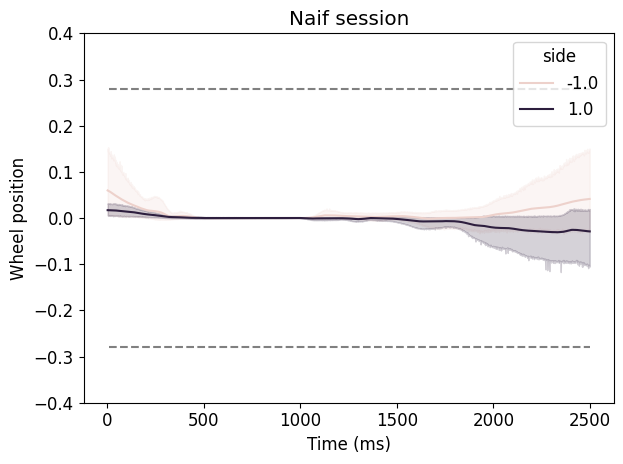

In [59]:
sessions = ['72cb7d25-8b9a-4c48-a57c-b1fcb1307010']  # naif session
sessions = ['7331502c-ac8b-4d1c-ae35-b384e95088f4']
all_wheel = wheel_interval(t_init, t_end, interval_length, sessions)
melted = pd.melt(all_wheel, id_vars=['feedback', 'choice', 'contrast', 'side'], value_vars=np.array(all_wheel.keys()[1:-4]))

plt.rc('font', size=12)

sns.lineplot(x='variable', y='value', hue='side', data=melted)
plt.xlabel('Time (ms)')
plt.ylabel('Wheel position')
plt.ylim([-.4, .4])
plt.title('Naif session')
plt.hlines(0.28, 9, 2500, color='grey', linestyles='dashed')
plt.hlines(-0.28, 9, 2500, color='grey', linestyles='dashed')

plt.tight_layout()

### Plot per contrast, choice, and feedback

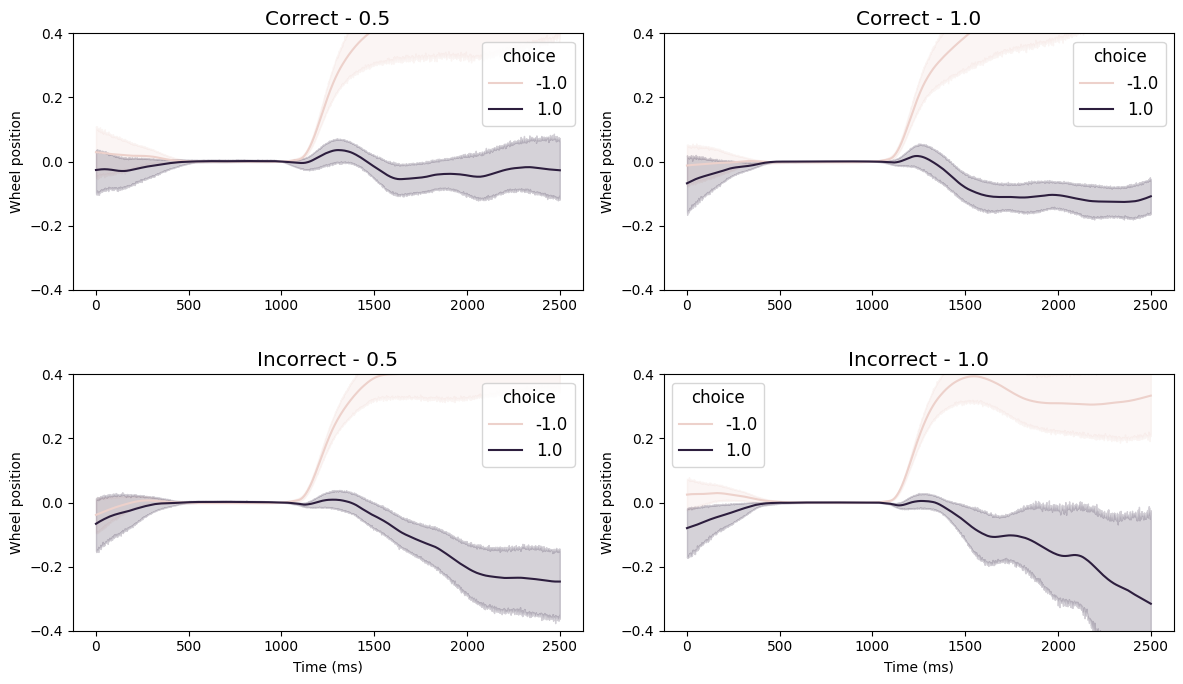

In [13]:
contrasts = melted.contrast.unique()
contrasts.sort()

fig, ax = plt.subplots(nrows=2, ncols=len(contrasts), sharex=False, sharey=False, figsize=[12, 7])

plt.rc('font', size=12)

for c, contrast in enumerate(contrasts):
    
    data_correct = melted.loc[(melted['contrast']==contrast) & (melted['feedback']==1.0)]
    data_incorrect = melted.loc[(melted['contrast']==contrast) & (melted['feedback']==0.0)]

    sns.lineplot(x='variable', y='value', hue='choice', data=data_correct, ax = ax[0, c])
    sns.lineplot(x='variable', y='value', hue='choice', data=data_incorrect, ax = ax[1, c])

    ax[0,c].set_xlabel(' ')
    ax[1,c].set_xlabel('Time (ms)')
    ax[0,c].set_ylabel('Wheel position')
    ax[1,c].set_ylabel('Wheel position')
    ax[0, c].set_ylim([-.4, .4])
    ax[1, c].set_ylim([-.4, .4])

    ax[0,c].set_title(str('Correct - ' + str(contrast)))
    ax[1,c].set_title(str('Incorrect - ' + str(contrast)))

plt.tight_layout()